In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heartdata.csv to heartdata.csv


# Data info

In [ ]:
import pandas as pd
data = pd.read_csv("heartdata.csv")
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,female,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,female,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,female,0,145,174,0,1,125,1,2.6,0,0,3,0
3,-61,female,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,male,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,male,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,female,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,female,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,female,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,female,0,122,286,0,0,116,1,3.2,1,2,2,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 112.2+ KB


In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Label Encoder**

Cột giới tính có dữ liệu kiểu object nên chuyển về dạng số.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])

In [ ]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,0,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,0,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,0,0,145,174,0,1,125,1,2.6,0,0,3,0
3,-61,0,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,1,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
round(data.describe().T , 2)

,count,mean,std,min,25%,50%,75%,max
age,1025.0,53.36,14.23,-90.0,47.0,56.0,61.0,77.0
sex,1025.0,0.30,0.46,0.0,0.0,0.0,1.0,1.0
cp,1025.0,0.94,1.03,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.61,17.52,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.00,51.59,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.15,0.36,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.53,0.53,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.11,23.01,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.34,0.47,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.07,1.18,0.0,0.0,0.8,1.8,6.2


age

->> giá trị nhỏ nhất là -90 -> sai lệch về độ tuổi bị âm.
chest pain type (4 values)

resting blood pressure

serum cholestoral in mg/dl

fasting blood sugar > 120 mg/dl

->>>>>> chỉ có 2 giá trị 0,1 mà trung bình chỉ 0,15 và 75% là 0 nên đa số chỉ số này ít người gặp.

resting electrocardiographic results (values 0,1,2)

maximum heart rate achieved

exercise induced angina

oldpeak = ST depression induced by exercise relative to rest

->>>>>> 75% có giá trị <1,8 trong khi max là 6.2 > cột này hơi bị lệch.

the slope of the peak exercise ST segment

number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

->>>tương tự Cột ca cũng tương đối lệch khi 75% <=1 mà max = 4

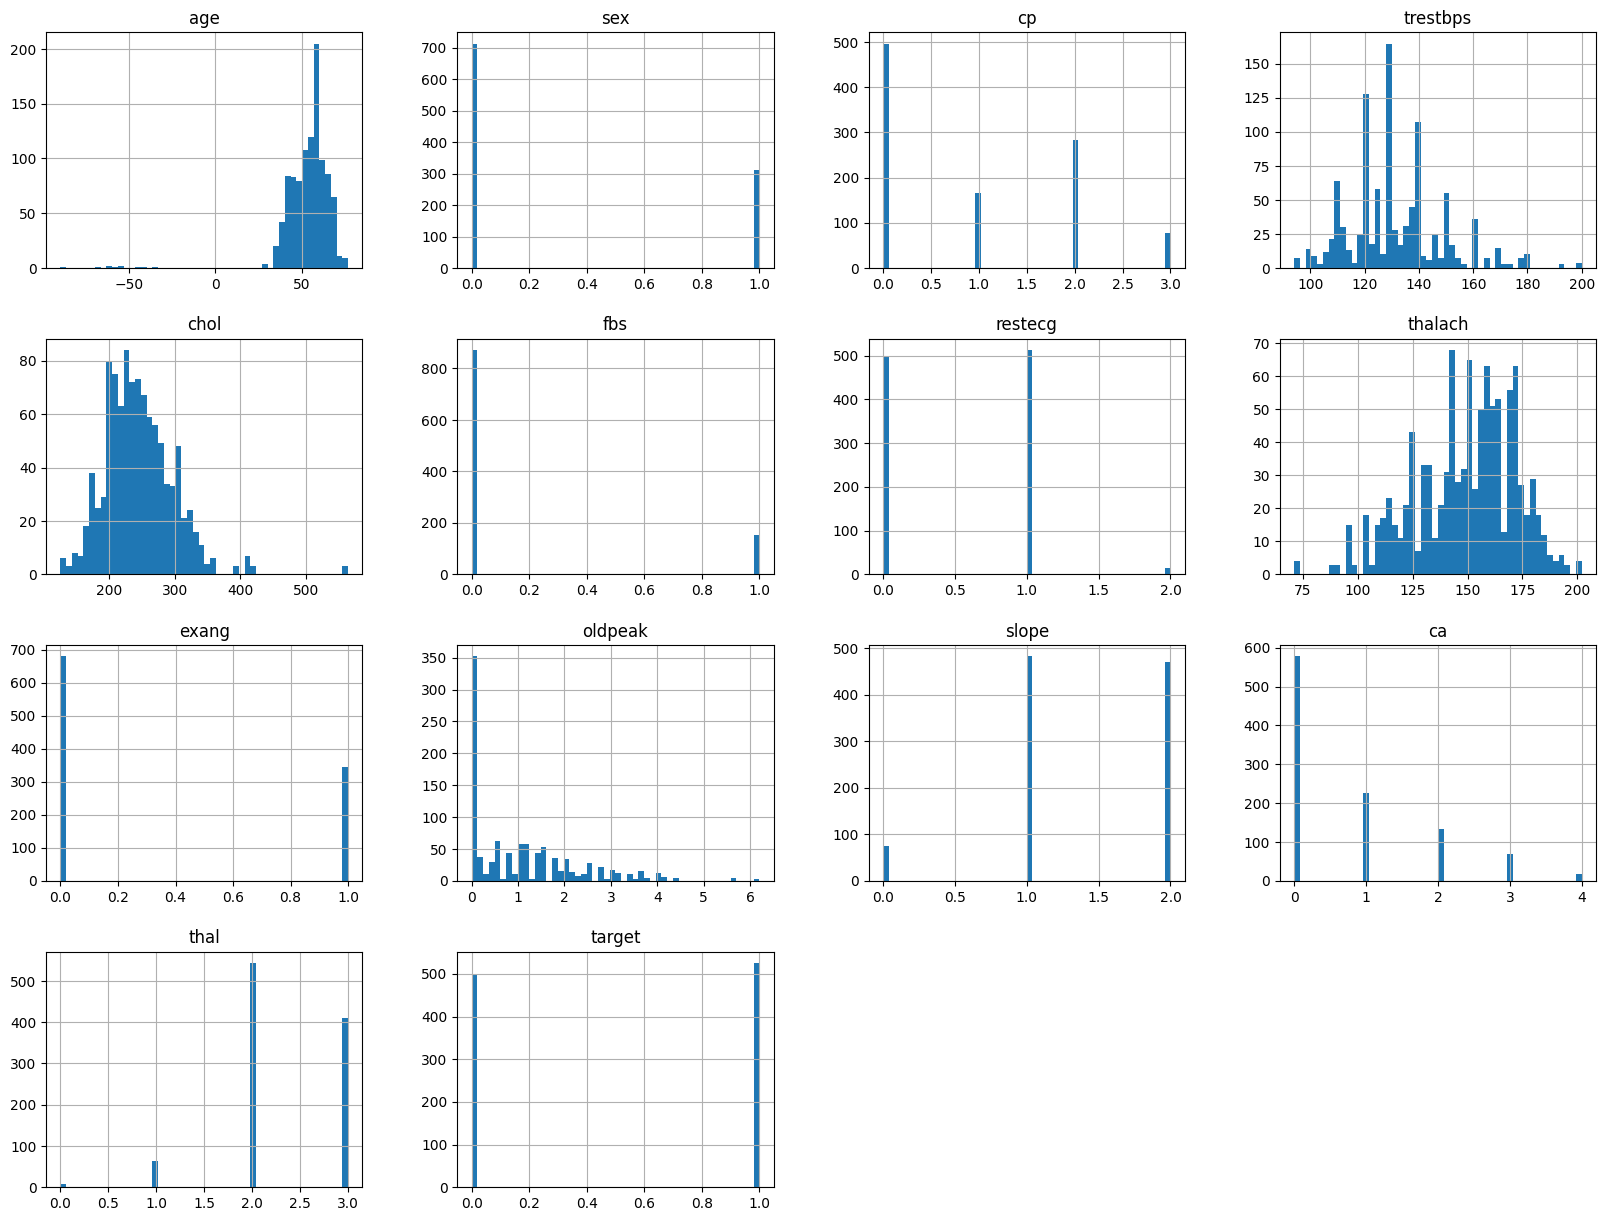

In [ ]:
# %matplotlib inline
from matplotlib import pyplot as plt

data.hist(bins=50, figsize=(20, 15));

In [ ]:
data.loc[data['age']<0,'age']

3      -61
12     -34
54     -55
122    -90
125    -60
164    -56
230    -58
296    -67
341    -44
1009   -40
Name: age, dtype: int64

In [ ]:
data.loc[data['age']<0,'age'] = data.loc[data['age']<0,'age']*-1

In [ ]:
data.loc[data['age']<0,'age'].count()

0

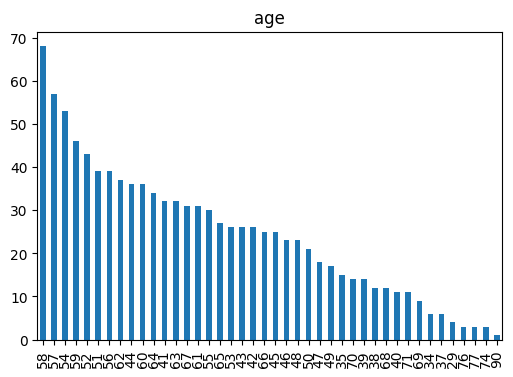

In [ ]:
target = data['age'].value_counts()
plt.figure(figsize=(6,4))
plt.title("age")
target.plot.bar()
plt.show()

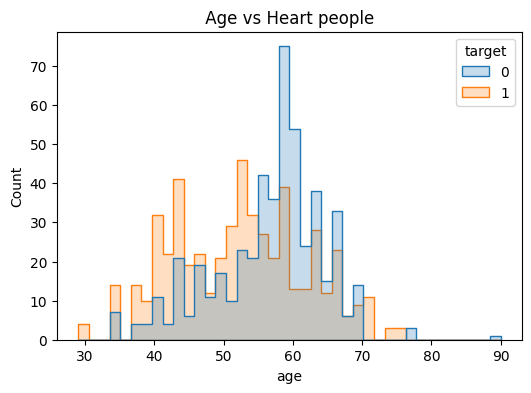

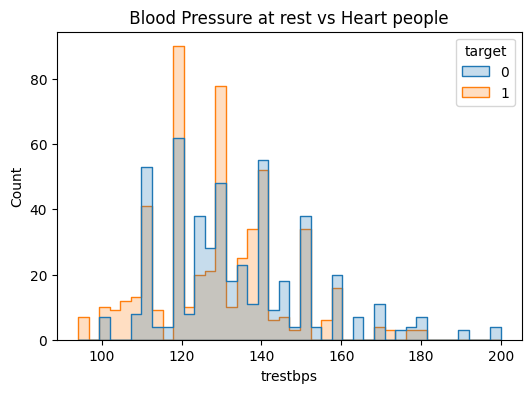

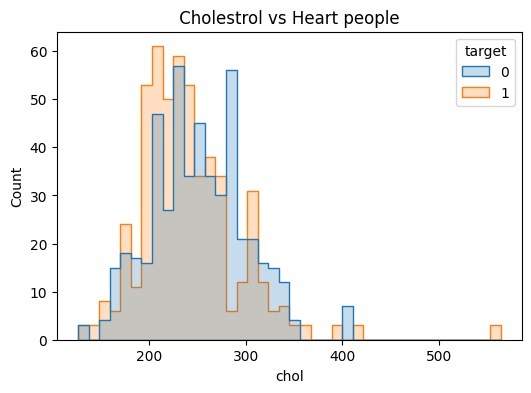

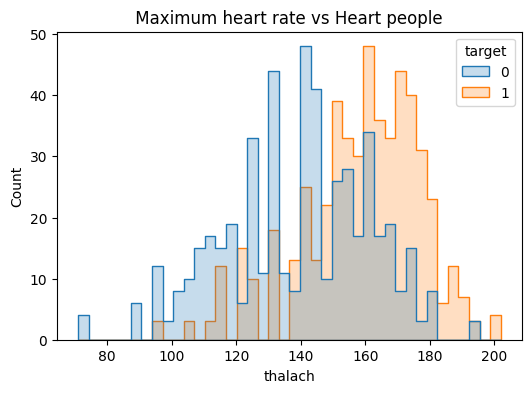

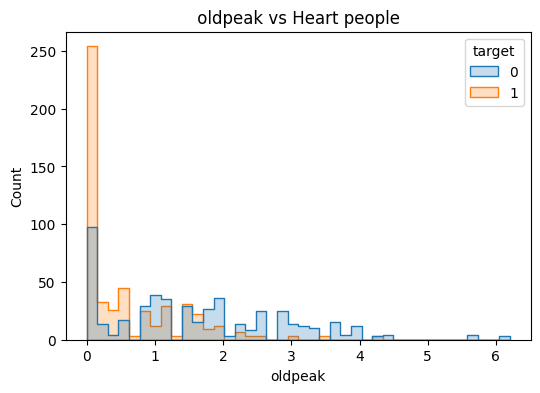

In [ ]:
import seaborn as sns
# %matplotlib inline

dic={"age":"Age" , "trestbps":"Blood Pressure at rest" , "chol":"Cholestrol", "thalach":"Maximum heart rate" , "oldpeak":"oldpeak"}
for col in data[["age" ,"trestbps" ,  "chol" , "thalach" , "oldpeak"]]:
    plt.figure(figsize=(6 , 4))
    sns.histplot(x=col, data=data , bins=40  , hue="target",element="step")
    plt.title(f" {dic[col]} vs Heart people ")
    plt.show()

# data preprocessing

Text(0.5, 1.0, 'Correlation')

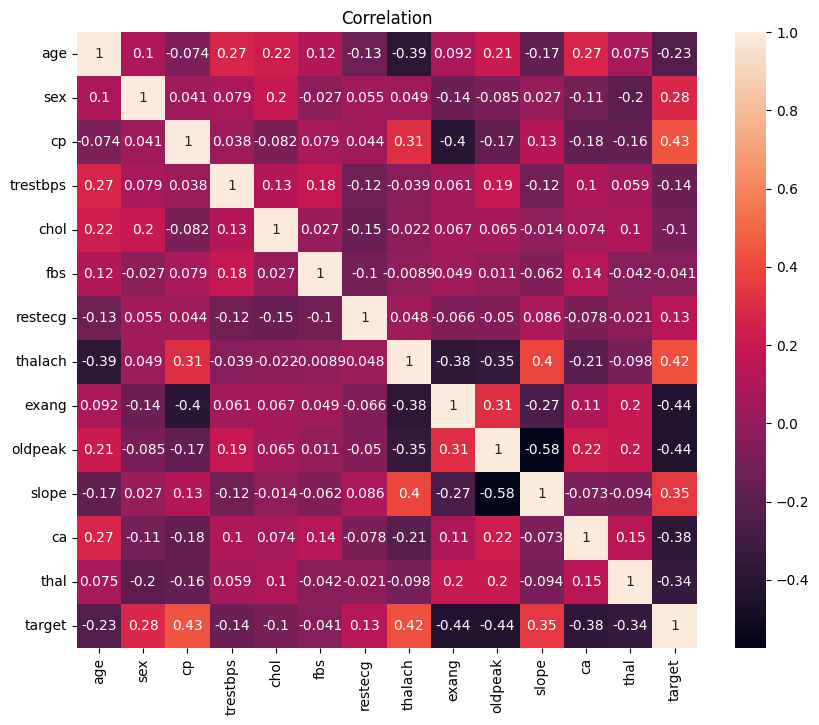

In [ ]:
plt.figure(figsize=(10 , 8))
sns.heatmap(data.corr() , annot=True)
plt.title("Correlation")

Để ý thấy target với fbs có độ tương quan khá ít.
Dùng ANOVA để phân tích sự khác nhau giữa giá trị trung bình của các biến phụ thuộc với nhau
- Giá trị F trong ANOVA càng cao thì độ biến thiên giữa các giá trị trung bình của mẫu càng cao so với độ biến thiên trong các mẫu.
- Nếu giá trị p nằm dưới một ngưỡng nhất định (ví dụ: α = 0,05), chúng ta có thể bác bỏ giả thuyết khống của ANOVA và kết luận rằng có sự khác biệt có ý nghĩa thống kê giữa các giá trị trung bình của nhóm.

In [ ]:
from scipy import stats
def anova(data, feature, label):
  groups = data[feature].unique() # discover each unique group value
  grouped_values = []           # create an overall list of keep track of the label sub-lists
  for group in groups:
    grouped_values.append(data[data[feature]==group][label])  # append a sub-list of label values into the overall list
  return stats.f_oneway(*grouped_values)   # use the '*' symbol to dynamically input each sub-list into the f_oneway_function separated by commans

for col in data.columns:
    f, p = anova(data, col, 'target')
    print(col)
    print(f'F: {f}')
    print('p: ',format(p,'f'))
    print('---------\n---------')

age
F: 5.075138569612
p:  0.000000
---------
---------
sex
F: 86.6897071028594
p:  0.000000
---------
---------
cp
F: 128.52868776274846
p:  0.000000
---------
---------
trestbps
F: 3.6713313310312845
p:  0.000000
---------
---------
chol
F: 8.068807904383279
p:  0.000000
---------
---------
fbs
F: 1.7363518455148192
p:  0.187897
---------
---------
restecg
F: 18.485134573492964
p:  0.000000
---------
---------
thalach
F: 5.819491035190311
p:  0.000000
---------
---------
exang
F: 242.88388949244612
p:  0.000000
---------
---------
oldpeak
F: 11.001667304008041
p:  0.000000
---------
---------
slope
F: 91.64491455048865
p:  0.000000
---------
---------
ca
F: 85.46191995289838
p:  0.000000
---------
---------
thal
F: 128.11844975171275
p:  0.000000
---------
---------
target
F: inf
p:  0.000000
---------
---------


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


Chạy xong ta thấy p của fbs cao hơn 0.05 nên cho thấy độ lệch khá cao nên có thể nói rằng fbs không ảnh hưởng tới targer kết quả cho lắm nên có thể bỏ đi được.

**Xử lý các điểm outline**

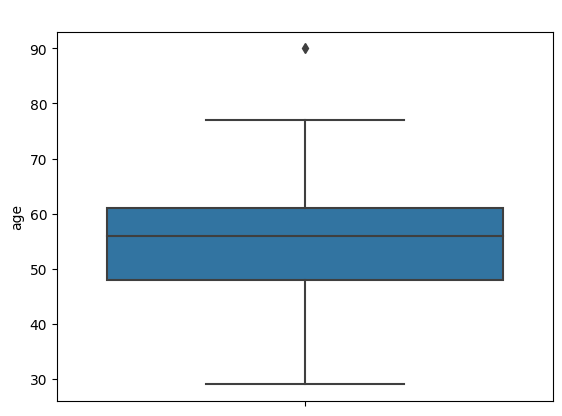

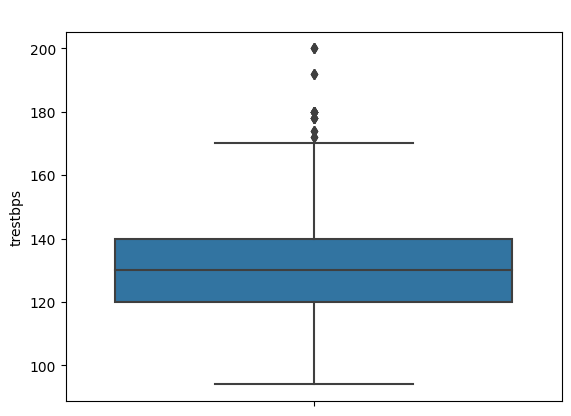

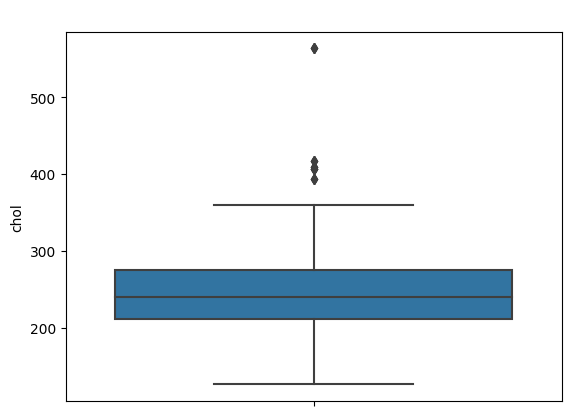

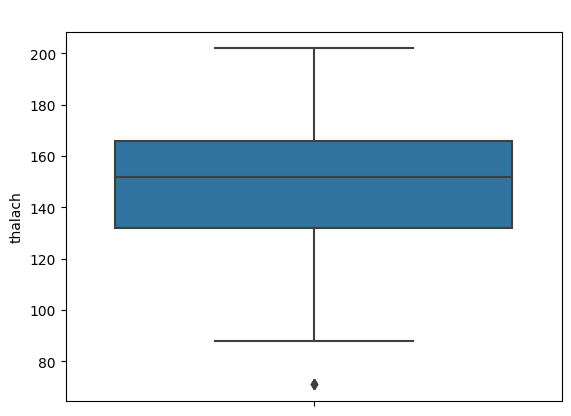

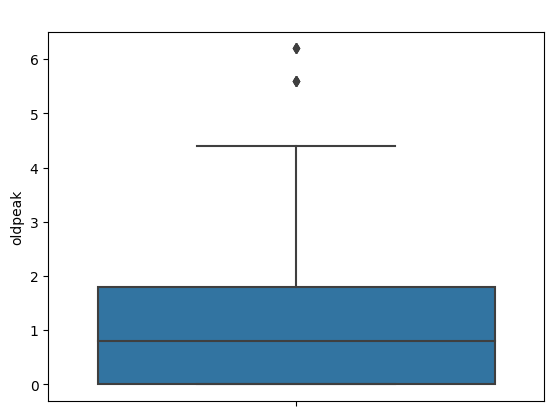

In [ ]:
col_fix = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in col_fix:
    sns.boxplot(data = data, y = col)
    plt.title(' ')
    plt.show()

**Xử lý outline bằng Z score**

Những điểm có z score nằm ngoài đoạn [−3,3] có thể được coi là các điểm ngoại lệ. Biến đổi toán học một chút, việc này tương đương với việc các điểm nằm ngoài đoạn [μ−3σ,μ+3σ] được coi là các điểm ngoại lệ.

In [ ]:
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin


def find_boxplot_boundaries(
    col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
    """Findx minimum and maximum in boxplot.

    Args:
        col: a pandas serires of input.
        whisker_coeff: whisker coefficient in box plot
    """
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper


class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

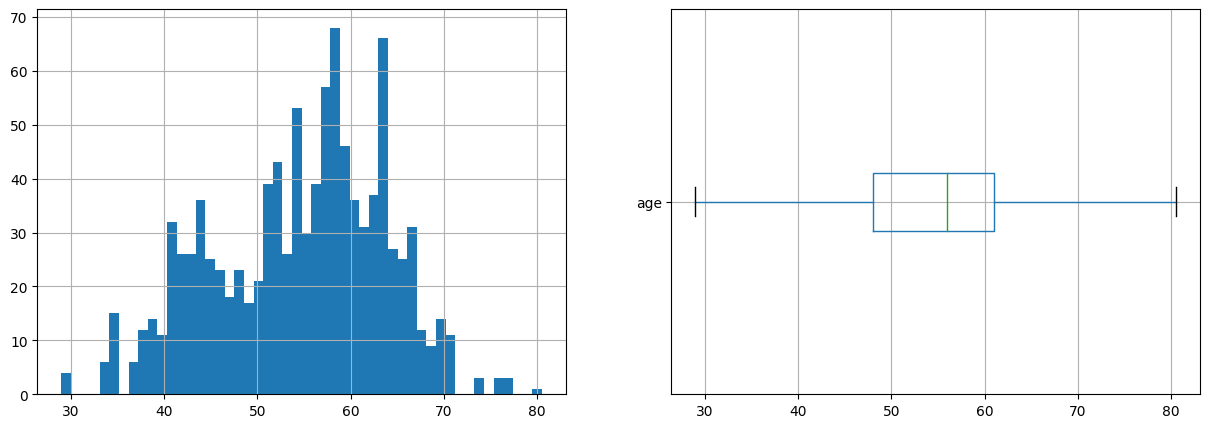

In [ ]:
age_fix = BoxplotOutlierClipper().fit_transform(data["age"])
data["age"] = age_fix
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
data["age"].hist(bins=50, ax=axes[0])
data["age"].to_frame().boxplot(ax=axes[1], vert=False);

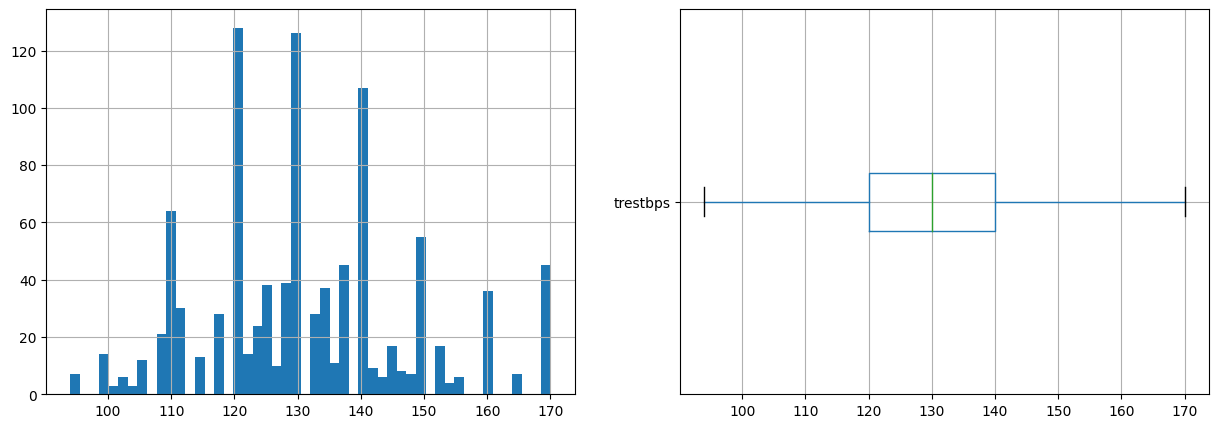

In [ ]:
data["trestbps"] = BoxplotOutlierClipper().fit_transform(data["trestbps"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
data["trestbps"].hist(bins=50, ax=axes[0])
data["trestbps"].to_frame().boxplot(ax=axes[1], vert=False);

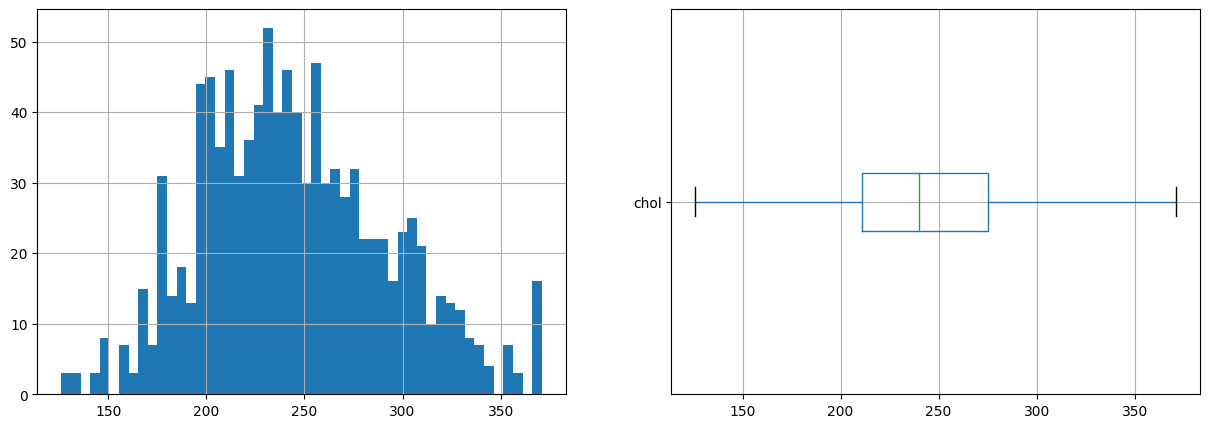

In [ ]:
data["chol"] = BoxplotOutlierClipper().fit_transform(data["chol"])
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
data["chol"].hist(bins=50, ax=axes[0])
data["chol"].to_frame().boxplot(ax=axes[1], vert=False);

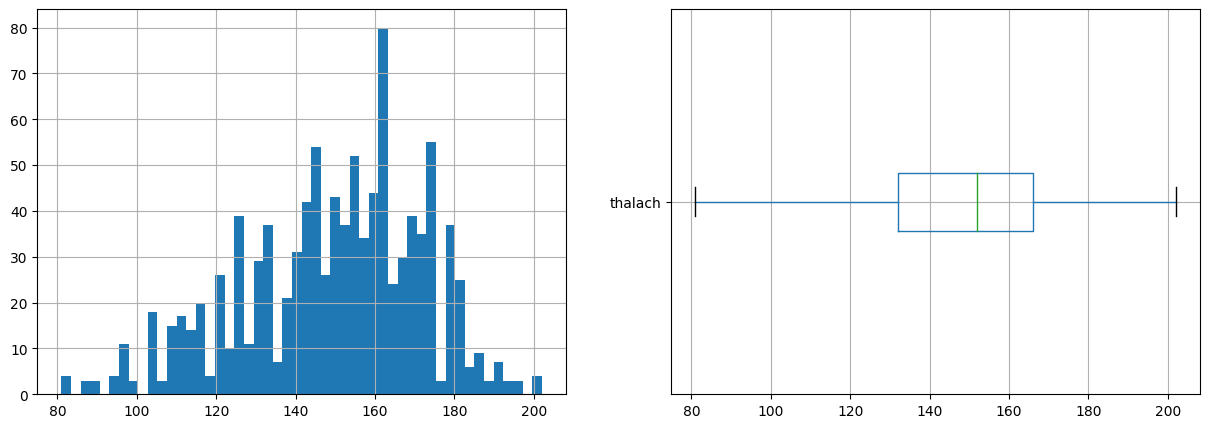

In [ ]:
data["thalach"] = BoxplotOutlierClipper().fit_transform(data["thalach"])
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
data["thalach"].hist(bins=50, ax=axes[0])
data["thalach"].to_frame().boxplot(ax=axes[1], vert=False);

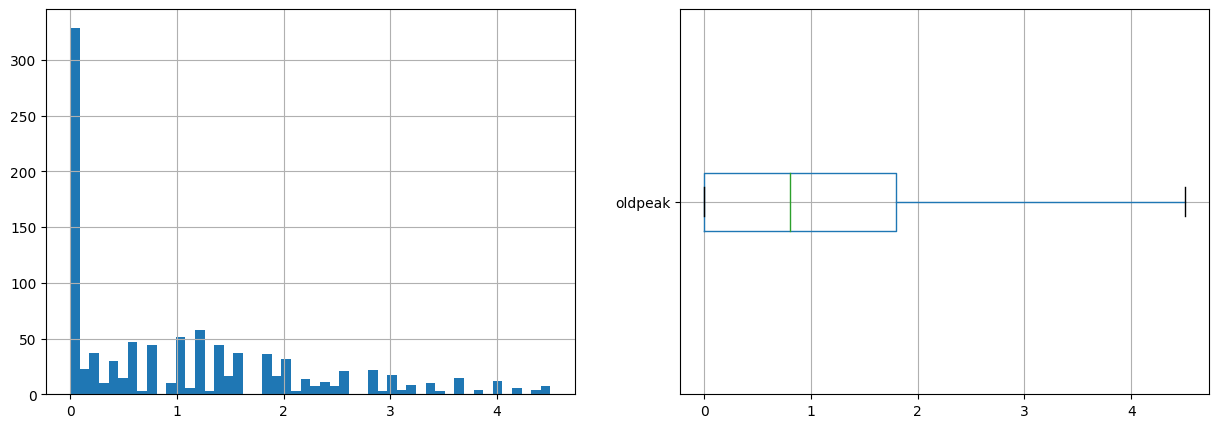

In [ ]:
data["oldpeak"] = BoxplotOutlierClipper().fit_transform(data["oldpeak"])
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
data["oldpeak"].hist(bins=50, ax=axes[0])
data["oldpeak"].to_frame().boxplot(ax=axes[1], vert=False);

# training use Folds for Random forest

**Training model**

Dùng Fold để dánh giá mô hình chuẩn xác hơn




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
# Trên kia đã loại bỏ cột fbs nên đây k cần sài cột này nữa
y = data["target"]
x = data.drop(['target','fbs'],axis=1)
# x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=2022,test_size=0.2)


#### -------- Dung folds
scaler = StandardScaler()

from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True)

predict_list = []
yOfAllFold = []
fold_idx=1
x_fold = x.to_numpy()
for train_index, test_index in kf.split(x):
  print("Bắt đầu train Fold ", fold_idx)
  # print("train: ",train_index,"Test: ",test_index)

  x_train, x_test = x_fold[train_index], x_fold[test_index]
  y_train, y_test = y[train_index], y[test_index]
  scaler.fit(x_train) # dung de scaler data
  x_train = scaler.transform(x_train)
  x_test = scaler.transform(x_test)

  rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
  rf.fit(x_train,y_train)

  # print accuracy for each fold
  rf_predicted = rf.predict(x_test)
  accuracy = accuracy_score(y_test,rf_predicted)
  print("--> accuracy fold = ",accuracy)

  # store predic of each fold
  predict_list.extend(rf_predicted)
  # store the ground truth for this specific fold
  yOfAllFold.extend(y_test)
  fold_idx += 1

# print accuracy of all fold
accuracy = accuracy_score(yOfAllFold, predict_list)
print("accuracy of all folds: ",accuracy)


Bắt đầu train Fold  1
--> accuracy fold =  0.912621359223301
Bắt đầu train Fold  2
--> accuracy fold =  0.9611650485436893
Bắt đầu train Fold  3
--> accuracy fold =  0.883495145631068
Bắt đầu train Fold  4
--> accuracy fold =  0.9029126213592233
Bắt đầu train Fold  5
--> accuracy fold =  0.941747572815534
Bắt đầu train Fold  6
--> accuracy fold =  0.8921568627450981
Bắt đầu train Fold  7
--> accuracy fold =  0.9509803921568627
Bắt đầu train Fold  8
--> accuracy fold =  0.9117647058823529
Bắt đầu train Fold  9
--> accuracy fold =  0.8921568627450981
Bắt đầu train Fold  10
--> accuracy fold =  0.9019607843137255
accuracy of all folds:  0.9151219512195122


# tạo tập Train, test để test mô hình.

Accuracy tương đối ổn, giờ tạo data train test để đo thử


In [ ]:
y = data["target"]
x = data.drop(['target','fbs'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=1,test_size=0.2)



Data trước khi đưa vào mô hình train phải  scaler lại

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)
# Dung dataframe để lát nữa lấy columns để vẽ cây.
x_train = pd.DataFrame(scaler.transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)


# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(x_train,y_train) # huấn luyện cho mô hình Random Forest
rf_predicted = rf.predict(x_test) # mô hình sau khi huấn luyện sẽ dùng tập kiểm tra để mô hình tiến hành dự đoán


In [ ]:
print(rf_predicted.size)


205


**vẽ Confusion matrix**

----------config_matrix values----------
[[93 16]
 [ 3 93]]


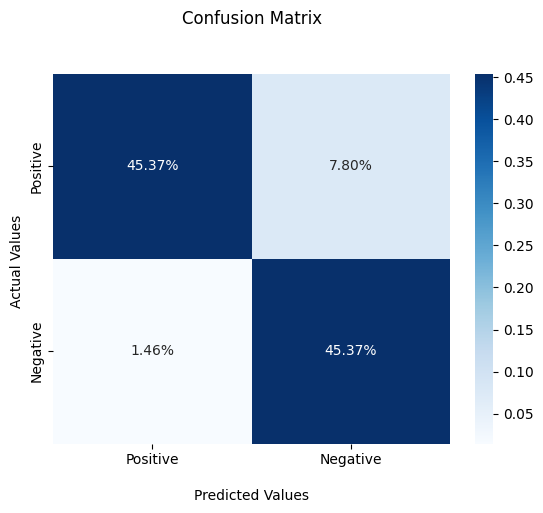

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

config_matrix = confusion_matrix(y_test, rf_predicted )
print('----------config_matrix values----------')
print(config_matrix)
# plot_confusion_matrix(confusion_matrix)
import numpy as np
import seaborn as sns
# ax = sns.heatmap(config_matrix/np.sum(config_matrix), annot=True,
#             fmt='.2%', cmap='Blues')
ax = sns.heatmap(config_matrix/np.sum(config_matrix), annot=True,
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Positive','Negative'])
ax.yaxis.set_ticklabels(['Positive','Negative'])

## Display the visualization of the Confusion Matrix.
plt.show()


**Score**

In [ ]:
def score(y_test,predict):
  a = [0 for i in range(4)]
  a[0] = precision_score(y_test, predict, average ='macro')
  a[1] = recall_score(y_test, predict, average='macro')
  a[2] = accuracy_score(y_test, predict)
  a[3] = f1_score(y_test, predict, average='macro')
  return a
listscore = ['precision','recall','accuracy','f1']


In [ ]:
rf_precision = precision_score(y_test, rf_predicted, average ='macro')
rf_recall = recall_score(y_test, rf_predicted, average='macro')
rf_accuracy = accuracy_score(y_test, rf_predicted)
rf_f1 = f1_score(y_test, rf_predicted, average='macro')


In [ ]:
print('Precision macro: ',rf_precision) # tính precision macro
print('Recall macro: ', rf_recall) # tính recall macro
print('Accuracy macro: ',rf_accuracy ) # tính accuracy macro
print('F1 Score weighted: ',rf_f1) # tính f1-score weighted

Precision macro:  0.910980504587156
Recall macro:  0.910980504587156
Accuracy macro:  0.9073170731707317
F1 Score weighted:  0.9073170731707316


In [ ]:
RF_score = score(y_test,rf_predicted)
for i in range(4):
  print(listscore[i],RF_score[i])

precision 0.910980504587156
recall 0.910980504587156
accuracy 0.9073170731707317
f1 0.9073170731707316


Visualize tree

In [ ]:
!pip install graphviz


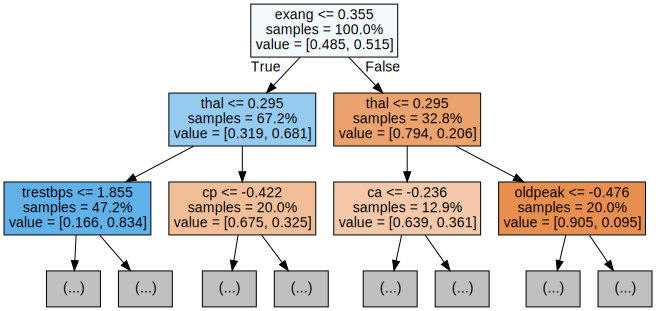

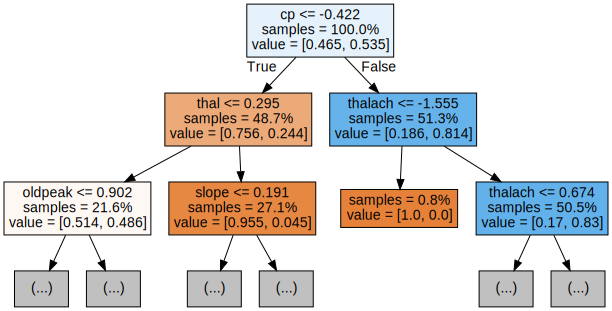

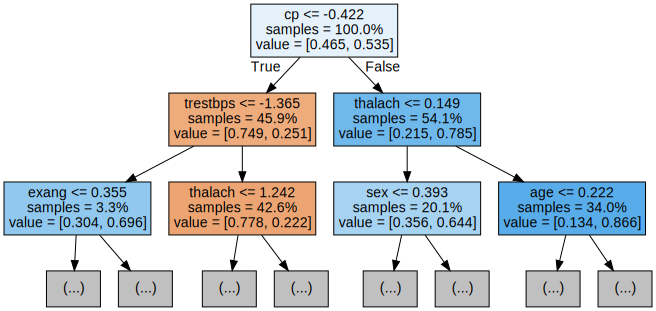

In [ ]:
from sklearn.tree import export_graphviz
# conda install python-graphviz
import graphviz

col = data.drop('target',axis=1).columns
X_imputed_df = pd.DataFrame(x_train, columns = col)

# visualize 3 cây đầu
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,feature_names=x_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

# Độ ảnh hưởng feature

In [ ]:
feature_scores = pd.Series(rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

cp          0.243654
thal        0.160857
oldpeak     0.117082
ca          0.098843
thalach     0.094137
slope       0.055920
age         0.053413
exang       0.050308
chol        0.041762
trestbps    0.039770
sex         0.029832
restecg     0.014422
dtype: float64

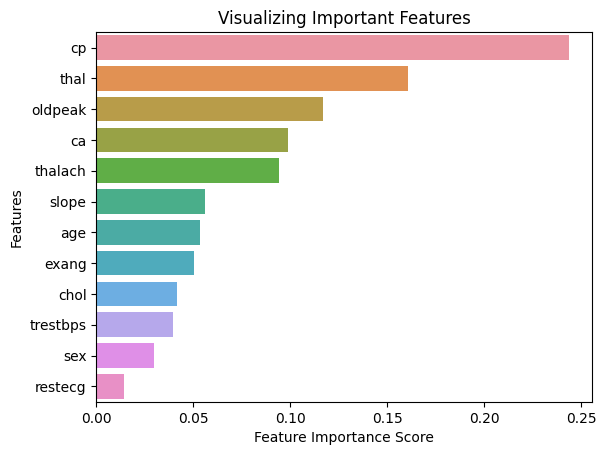

In [ ]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()


# Decision Tree

Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_clf= DecisionTreeClassifier(criterion= 'gini', max_depth =20, max_features='sqrt', min_samples_leaf= 4,min_samples_split=10, random_state=None, splitter='random')
DT_clf.fit(x_train,y_train)
DT_predicted = DT_clf.predict(x_test)

In [ ]:
DT_precision = precision_score(y_test, DT_predicted, average ='macro')
DT_recall = recall_score(y_test, DT_predicted, average='macro')
DT_accuracy = accuracy_score(y_test, DT_predicted)
DT_f1 = f1_score(y_test, DT_predicted, average='macro')


In [ ]:
print('Precision macro: ',DT_precision) # tính precision macro
print('Recall macro: ', DT_recall) # tính recall macro
print('Accuracy macro: ',DT_accuracy ) # tính accuracy macro
print('F1 Score weighted: ',DT_f1) # tính f1-score weighted

Precision macro:  0.8703986267404158
Recall macro:  0.871177370030581
Accuracy macro:  0.8682926829268293
F1 Score weighted:  0.868280145641465


# So sánh RF vs DT

**So sánh Random fforest vs Decision tree**

In [ ]:
df = pd.DataFrame({"precision":[DT_precision,rf_precision],
                   "recall":[DT_recall,rf_recall],
                   "accuracy":[DT_accuracy,rf_accuracy],
                   "F1":[DT_f1,rf_f1]},
                   index = ["DT","RF"])
df

,precision,recall,accuracy,F1
DT,0.870399,0.871177,0.868293,0.868280
RF,0.910981,0.910981,0.907317,0.907317


<Axes: >

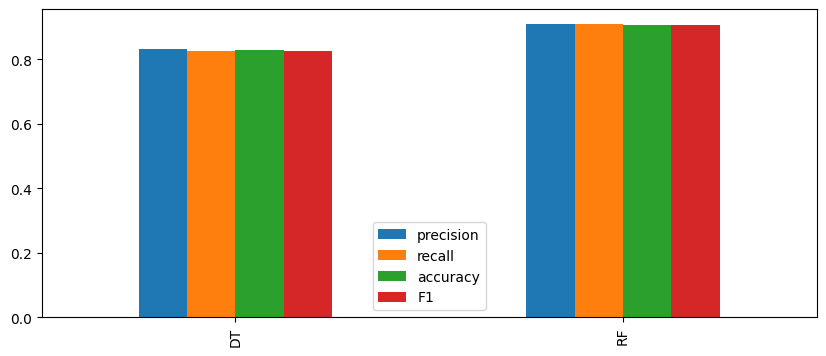

In [ ]:
df.plot(kind="bar", figsize = (10, 4))


# Dùng random search để tìm thông số cho RF

**Tìm các thông số thích hợp cho cây**

In [ ]:
import random
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 1)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 110, num = 1)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2,3,4,5,6,7,8,9,10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid_RF = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# print(random_grid)
max_leaf_node = [2,3,4,5,6,7,8,9,10]
random_grid_DT = {'criterion':['gini','entropy'],
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'max_leaf_nodes':max_leaf_node}


In [ ]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42)

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid_RF, n_iter = 10, cv = 2, verbose=True, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)




Fitting 2 folds for each of 10 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=2,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [10]},
                   random_state=42, verbose=True)

Lưu các giá trị thành Dataframe

In [ ]:
save_best_RF = pd.DataFrame(rf_random.cv_results_)
save_best_RF

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.092138,0.014833,0.057074,0.001281,10,15,2,sqrt,None,True,"{'n_estimators': 10, 'min_samples_split': 15, ...",0.826829,0.875610,0.851220,0.024390,5
1,0.080327,0.018533,0.031587,0.013279,10,2,4,auto,None,True,"{'n_estimators': 10, 'min_samples_split': 2, '...",0.843902,0.885366,0.864634,0.020732,3
2,0.055048,0.004158,0.035367,0.006289,10,15,1,sqrt,1,True,"{'n_estimators': 10, 'min_samples_split': 15, ...",0.782927,0.751220,0.767073,0.015854,6
3,0.052915,0.008175,0.025440,0.003021,10,15,6,sqrt,1,True,"{'n_estimators': 10, 'min_samples_split': 15, ...",0.782927,0.751220,0.767073,0.015854,6
4,0.065497,0.008635,0.022720,0.000333,10,10,1,auto,None,False,"{'n_estimators': 10, 'min_samples_split': 10, ...",0.921951,0.904878,0.913415,0.008537,1
5,0.057196,0.003067,0.038309,0.006089,10,2,4,sqrt,None,True,"{'n_estimators': 10, 'min_samples_split': 2, '...",0.843902,0.885366,0.864634,0.020732,3
6,0.042245,0.002572,0.029240,0.010323,10,5,2,auto,1,False,"{'n_estimators': 10, 'min_samples_split': 5, '...",0.768293,0.751220,0.759756,0.008537,9
7,0.055465,0.007963,0.035699,0.013473,10,2,4,auto,None,False,"{'n_estimators': 10, 'min_samples_split': 2, '...",0.882927,0.890244,0.886585,0.003659,2
8,0.074778,0.021611,0.058413,0.002114,10,5,1,sqrt,1,False,"{'n_estimators': 10, 'min_samples_split': 5, '...",0.768293,0.751220,0.759756,0.008537,9
9,0.126955,0.024521,0.042974,0.003030,10,10,4,sqrt,1,True,"{'n_estimators': 10, 'min_samples_split': 10, ...",0.782927,0.751220,0.767073,0.015854,6


Mấy thông số cho cây tối ưu nhất.

In [ ]:
cls = RandomForestClassifier(n_estimators=10,min_samples_split=15,min_samples_leaf=1,max_depth=10,max_features='sqrt',bootstrap=True)
cls.fit(x_train,y_train)

cls_predicted = cls.predict(x_test) # mô hình sau khi huấn luyện sẽ dùng tập kiểm tra để mô hình tiến hành dự đoán
print(cls_predicted.size)


205


In [ ]:
print('Precision macro: %.3f'  % precision_score(y_test, cls_predicted, average ='macro')) # tính precision macro
print('Recall macro: %.3f' % recall_score(y_test, cls_predicted, average='macro')) # tính recall macro
print('Accuracy : %.3f' % accuracy_score(y_test, cls_predicted)) # tính accuracy macro
print('F1 Score weighted: %.3f' % f1_score(y_test, cls_predicted, average='weighted')) # tính f1-score weighted

Precision macro: 0.975
Recall macro: 0.977
Accuracy : 0.976
F1 Score weighted: 0.976


# Random search cho DT

In [ ]:
DT = DecisionTreeClassifier()

DT = RandomizedSearchCV(estimator = DT, param_distributions = random_grid_DT, n_iter = 10, cv = 2, verbose=True, random_state=42, n_jobs = -1)
DT.fit(x_train, y_train)


Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, None],
                                        'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7,
                                                           8, 9, 10],
                                        'min_samples_split': [2, 5, 10, 15]},
                   random_state=42, verbose=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_leaf_nodes,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.239315,0.006143,0.025848,0.000238,5,7,1,entropy,"{'min_samples_split': 5, 'max_leaf_nodes': 7, ...",0.797561,0.841463,0.819512,0.021951,6
1,0.229531,0.000994,0.026182,0.000128,2,8,1,entropy,"{'min_samples_split': 2, 'max_leaf_nodes': 8, ...",0.797561,0.841463,0.819512,0.021951,6
2,0.241102,0.004271,0.026852,0.000700,5,6,None,entropy,"{'min_samples_split': 5, 'max_leaf_nodes': 6, ...",0.856098,0.846341,0.851220,0.004878,1
3,0.233722,0.007257,0.026127,0.000072,15,4,None,gini,"{'min_samples_split': 15, 'max_leaf_nodes': 4,...",0.856098,0.836585,0.846341,0.009756,3
4,0.234608,0.007806,0.025875,0.000091,10,4,1,entropy,"{'min_samples_split': 10, 'max_leaf_nodes': 4,...",0.797561,0.841463,0.819512,0.021951,6
5,0.224528,0.003162,0.025952,0.000046,5,8,1,gini,"{'min_samples_split': 5, 'max_leaf_nodes': 8, ...",0.821951,0.841463,0.831707,0.009756,5
6,0.218863,0.004960,0.025883,0.000068,5,6,1,entropy,"{'min_samples_split': 5, 'max_leaf_nodes': 6, ...",0.797561,0.841463,0.819512,0.021951,6
7,0.232909,0.004637,0.026849,0.000767,15,3,None,gini,"{'min_samples_split': 15, 'max_leaf_nodes': 3,...",0.836585,0.834146,0.835366,0.001220,4
8,0.240631,0.007753,0.042833,0.017013,2,6,1,entropy,"{'min_samples_split': 2, 'max_leaf_nodes': 6, ...",0.797561,0.841463,0.819512,0.021951,6
9,0.235661,0.001718,0.025577,0.000235,10,6,None,entropy,"{'min_samples_split': 10, 'max_leaf_nodes': 6,...",0.853659,0.841463,0.847561,0.006098,2


In [ ]:
DT_cls= DecisionTreeClassifier(criterion= 'entropy', max_depth =None, min_samples_leaf= 6,min_samples_split=5)
DT_cls.fit(x_train,y_train)

DT_cls_predicted = DT_cls.predict(x_test) # mô hình sau khi huấn luyện sẽ dùng tập kiểm tra để mô hình tiến hành dự đoán
print(cls_predicted.size)


205


In [ ]:
print('Precision macro: %.3f'  % precision_score(y_test, DT_cls_predicted, average ='macro')) # tính precision macro
print('Precision weighted: %.3f'  % precision_score(y_test, DT_cls_predicted, average ='weighted')) # tính precision weighted
print('Recall macro: %.3f' % recall_score(y_test, DT_cls_predicted, average='macro')) # tính recall macro
print('Recall weighted: %.3f' % recall_score(y_test, DT_cls_predicted, average='weighted')) # tính recall weighted
print('Accuracy macro: %.3f' % accuracy_score(y_test, DT_cls_predicted)) # tính accuracy macro
print('F1 Score weighted: %.3f' % f1_score(y_test, DT_cls_predicted, average='weighted')) # tính f1-score weighted

Precision macro: 0.933
Precision weighted: 0.932
Recall macro: 0.930
Recall weighted: 0.932
Accuracy macro: 0.932
F1 Score weighted: 0.932


# Cuối kỳ
# So sánh các model.

Tạo data mới.

In [ ]:
from sklearn.datasets import make_classification
import pandas as pd
X, y = make_classification(
    n_samples=33000, # 1000 observations
    n_features=20, # 5 total features
    n_informative=15, # 3 'useful' features
    n_classes=3, # binary target/label
    # flip_y - high value to add more noise
    flip_y=0.4,
    # class_sep - low value to reduce space between classes
    class_sep=0.8,
    # weights to control balance of data ex: 0.97: 97% is 0, only 3% is 1
    weights=[0.4, 0.2,0.6]
    )

In [ ]:
dataset = pd.DataFrame(X)
# give custom names to the features
dataset.columns = ['X1', 'X2', 'X3', 'X4', 'X5','X6', 'X7', 'X8', 'X9', 'X10','X11','X12','X13','X14','X15','X16','X17','X18','X19','X20']
# Now add the label as a column
dataset['y'] = y

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      33000 non-null  float64
 1   X2      33000 non-null  float64
 2   X3      33000 non-null  float64
 3   X4      33000 non-null  float64
 4   X5      33000 non-null  float64
 5   X6      33000 non-null  float64
 6   X7      33000 non-null  float64
 7   X8      33000 non-null  float64
 8   X9      33000 non-null  float64
 9   X10     33000 non-null  float64
 10  X11     33000 non-null  float64
 11  X12     33000 non-null  float64
 12  X13     33000 non-null  float64
 13  X14     33000 non-null  float64
 14  X15     33000 non-null  float64
 15  X16     33000 non-null  float64
 16  X17     33000 non-null  float64
 17  X18     33000 non-null  float64
 18  X19     33000 non-null  float64
 19  X20     33000 non-null  float64
 20  y       33000 non-null  int64  
dtypes: float64(20), int64(1)
memory usa

In [ ]:
dataset['y'].value_counts()


0    11255
3     9250
1     7194
2     5301
Name: y, dtype: int64

In [ ]:
dataset.head(5)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,y
0,1.888658,-2.024618,2.494835,-0.081234,-1.924987,0.044377,-1.728513,1.888078,-2.079272,-0.990822,...,1.315418,0.728878,-1.935135,4.737404,-0.532636,-0.903360,-3.409611,2.592348,-5.875235,3
1,3.495638,4.165345,-1.188960,-4.419656,0.751286,-2.672136,2.863417,-0.675153,-2.177526,0.506815,...,0.809070,-3.228964,0.966596,1.874798,-1.557868,0.568850,-1.317314,3.764911,-4.791511,1
2,-1.364203,-0.035281,-3.763260,1.675853,1.086309,0.897342,-3.467613,0.167643,2.514634,-1.482892,...,-6.161072,2.240744,1.918005,-1.543546,-1.710376,-1.762553,-2.145722,-9.140595,0.888388,0
3,0.420306,-0.604520,2.602449,0.674376,-3.885761,1.226264,-0.811837,0.842721,-1.125887,1.291476,...,2.226105,-1.287989,0.473398,-2.366501,5.206532,0.785079,-0.150564,-3.321534,7.897368,2
4,-1.610616,-0.407994,1.333727,2.234348,-2.640697,-0.074287,0.965456,-0.240651,-1.383081,0.290727,...,-2.253988,1.528482,-0.302474,-1.576045,1.376170,1.432876,2.839609,-3.797518,-0.680578,0


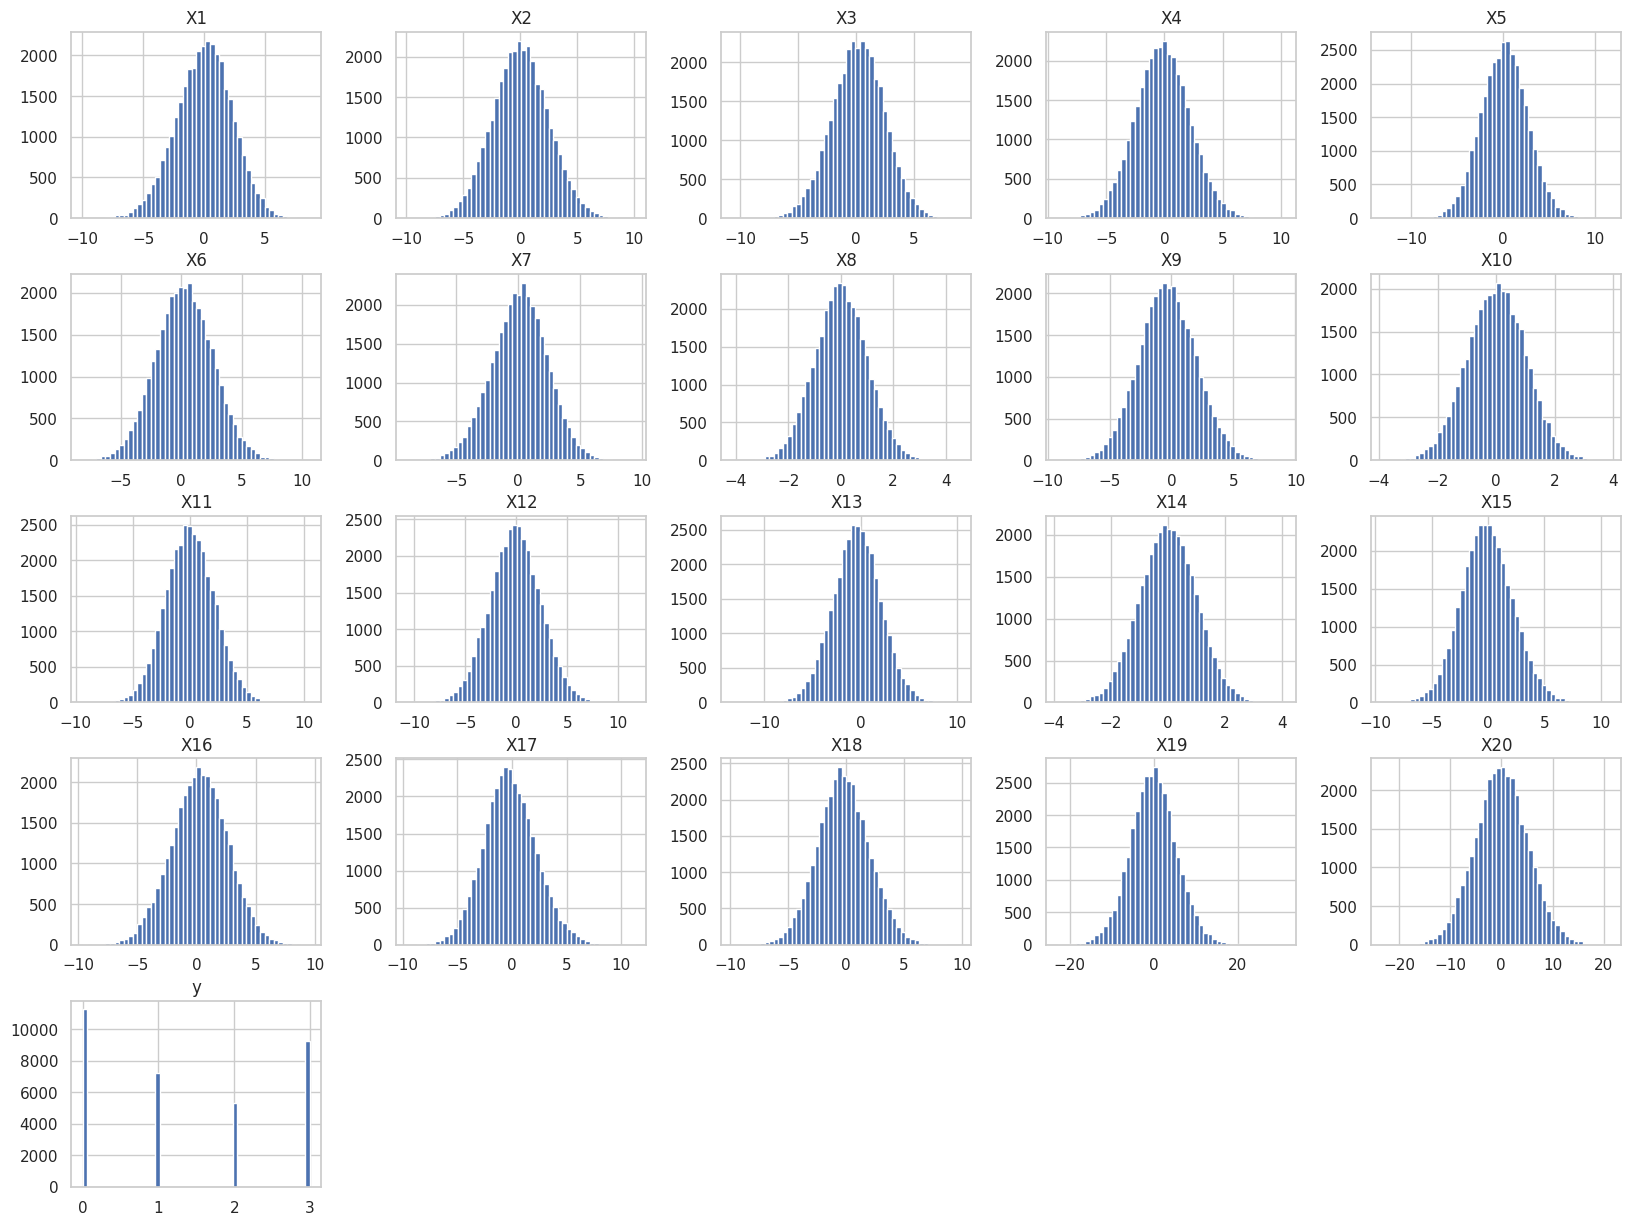

In [ ]:
dataset.hist(bins=50, figsize=(20, 15));

In [ ]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X, y,random_state=1,test_size=0.2)
xtrainmini = xtrain[0:1000]
ytrainmini = ytrain[0:1000]
print(xtrainmini.shape)
print(ytrainmini.shape)
print(xtest.shape)
print(ytest.shape)

(1000, 20)
(1000,)
(6600, 20)
(6600,)


# RF

Random forest

In [ ]:
def randomSearchDT():
  max_leaf_node = [2,3,4,5,6,7,8,9,10]
  min_samples_split = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
  max_depth = [int(x) for x in np.linspace(1, 110, num = 5)]
  random_grid_DT = {'criterion':['gini','entropy'],
                'max_depth':max_depth,
                'min_samples_split':min_samples_split,
                'max_leaf_nodes':max_leaf_node}
  return random_grid_DT
def randomSearchRF():
  n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 1)]
  # Number of features to consider at every split
  max_features = ['auto', 'sqrt']
  # Maximum number of levels in tree
  max_depth = [int(x) for x in np.linspace(1, 110, num = 5)]
  # max_depth.append(None)
  # Minimum number of samples required to split a node
  min_samples_split = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
  # Minimum number of samples required at each leaf node
  min_samples_leaf = [2,3,4,5,6,7,8,9,10]
  # Method of selecting samples for training each tree
  bootstrap = [True, False]
  # Create the random grid
  random_grid_RF = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}
  return random_grid_RF

# Import Lib

In [ ]:
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from hyperopt import STATUS_OK, Trials,fmin,hp,tpe
from hyperopt.pyll import scope
from math import gamma
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
def scoreDF(y_test,predict,name,time):
  a2 = precision_score(y_test, predict, average ='macro')
  a3 = recall_score(y_test, predict, average='macro')
  a1 = accuracy_score(y_test, predict)
  a4 = f1_score(y_test, predict, average='macro')
  dic = {
      'name':name,
      'accuracy':[a1],
      'precision':[a2],
      'recall':[a3],
      'f1':[a4],
      'time fit':float(time)
  }
  df = pd.DataFrame(dic)
  # df = pd.DataFrame([[a1],[a2],[a3],[a4]],columns=['accuracy','precision','recall','f1'])
  return df

In [ ]:
RF_clf = RandomForestClassifier(n_jobs=-1)
random_grid_RF = randomSearchRF()
RF_clf_search = RandomizedSearchCV(estimator = RF_clf, param_distributions = random_grid_RF, n_iter = 20, cv = 5, verbose=True, random_state=42, n_jobs = -1)
RF_clf_search.fit(xtrainmini,ytrainmini)

best = pd.DataFrame(RF_clf_search.cv_results_)
best.loc[(best['rank_test_score']<5)]


Fitting 5 folds for each of 20 candidates, totalling 100 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.095167,0.014997,0.042341,0.008231,10,5,8,auto,110,True,"{'n_estimators': 10, 'min_samples_split': 5, '...",0.455,0.510,0.475,0.495,0.460,0.479,0.020833,4
5,0.069125,0.010972,0.015077,0.000828,10,15,3,sqrt,82,False,"{'n_estimators': 10, 'min_samples_split': 15, ...",0.515,0.475,0.510,0.475,0.465,0.488,0.020396,2
6,0.056252,0.004904,0.014479,0.000650,10,6,8,sqrt,28,True,"{'n_estimators': 10, 'min_samples_split': 6, '...",0.460,0.520,0.480,0.500,0.435,0.479,0.029732,4
12,0.063767,0.008799,0.015263,0.001206,10,7,5,sqrt,28,False,"{'n_estimators': 10, 'min_samples_split': 7, '...",0.470,0.500,0.465,0.500,0.480,0.483,0.014697,3
16,0.071678,0.003699,0.015880,0.001688,10,13,4,sqrt,110,False,"{'n_estimators': 10, 'min_samples_split': 13, ...",0.460,0.505,0.525,0.520,0.500,0.502,0.022935,1


score của tập test

In [ ]:
# Đo thời gian huấn luyện cho Random Forest
start_time_rf = time.time()
# RF_clf = RandomForestClassifier(n_estimators=10,min_samples_split=13,min_samples_leaf=4,max_features='sqrt',max_depth=110,bootstrap=False,n_jobs=-1)
RF_clf = RandomForestClassifier(n_estimators=10,min_samples_split=13,min_samples_leaf=4,max_depth=110,bootstrap=False,n_jobs=-1)

RF_clf=RF_clf.fit(xtrain,ytrain)
end_time_rf = time.time()
training_time_rf = end_time_rf - start_time_rf

RF_clf_predict = RF_clf.predict(xtest)
# RFscore = score(ytest,RF_clf_predict)
# for i in range(4):
#   print(listscore[i],RFscore[i])
RFscore = scoreDF(ytest,RF_clf_predict,'RF',training_time_rf)
RFscore

,name,accuracy,precision,recall,f1,time fit
0,RF,0.638636,0.638369,0.618291,0.620703,1.420794


# adaboost decision tree

In [ ]:
DT = DecisionTreeClassifier()
random_grid_DT = randomSearchDT()
DT = RandomizedSearchCV(estimator = DT, param_distributions = random_grid_DT, n_iter = 10, cv = 5, verbose=True, random_state=42, n_jobs = -1)
DT.fit(xtrainmini, ytrainmini)
save_best_DT = pd.DataFrame(DT.cv_results_)
save_best_DT.loc[(save_best_DT['rank_test_score']<5)]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_leaf_nodes,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.030759,0.007851,0.001195,0.000099,8,9,28,entropy,"{'min_samples_split': 8, 'max_leaf_nodes': 9, ...",0.405,0.460,0.425,0.390,0.44,0.424,0.024779,3
6,0.017298,0.005956,0.001208,0.000129,6,8,82,gini,"{'min_samples_split': 6, 'max_leaf_nodes': 8, ...",0.420,0.425,0.435,0.405,0.45,0.427,0.015033,1
7,0.043344,0.007490,0.001896,0.001129,8,9,110,entropy,"{'min_samples_split': 8, 'max_leaf_nodes': 9, ...",0.405,0.460,0.425,0.390,0.44,0.424,0.024779,3
8,0.018993,0.007312,0.002176,0.001244,10,7,55,gini,"{'min_samples_split': 10, 'max_leaf_nodes': 7,...",0.415,0.425,0.435,0.415,0.44,0.426,0.010198,2


In [ ]:
DT =  DecisionTreeClassifier(min_samples_split=10,max_leaf_nodes=7,max_depth=55,criterion="gini")

In [ ]:
lr = [0.0001, 0.001, 0.01, 0.1, 1.0]
ne = [50, 100,200, 300,400]
for i in lr:
  for j in ne:
    adaboost_clf_DT = AdaBoostClassifier(estimator=DT, n_estimators=j,random_state=1,learning_rate=i)
    adaboost_clf_DT=adaboost_clf_DT.fit(xtrain,ytrain)
    adaboost_predict = adaboost_clf_DT.predict(xtest)
    adaboostscore2 = scoreDF(ytest,adaboost_predict,'d',1)
    print(adaboostscore2.head())
    print(j,i)

In [ ]:
start_time_adaboost = time.time()
adaboost_clf_DT = AdaBoostClassifier(estimator=DT, n_estimators=400,random_state=1,learning_rate=0.01)
adaboost_clf_DT=adaboost_clf_DT.fit(xtrain,ytrain)
end_time_adaboost = time.time()
training_time_adaboost = end_time_adaboost-start_time_adaboost
adaboost_predict = adaboost_clf_DT.predict(xtest)
adaboostscore = scoreDF(ytest,adaboost_predict,'Adaboost',training_time_adaboost)
adaboostscore.head()

,name,accuracy,precision,recall,f1,time fit
0,Adaboost,0.510606,0.561466,0.434355,0.395949,153.123778


Phần này làm early stop bằng tay cho adaboost

In [ ]:
best_iteration = 0
best_score = 0
tolerance = 20  # Số lượng vòng lặp không cải thiện trước khi dừng
ab = AdaBoostClassifier(estimator=DT,random_state=1,learning_rate=0.01)

for i in range(1, 1000):  # Vòng lặp tối đa
    ab.n_estimators = i
    start=time.time()
    ab.fit(xtrain, ytrain)
    end=time.time()
    traintime=end-start
    y_pred = ab.predict(xtest)
    score = accuracy_score(ytest, y_pred)

    if score > best_score:
        best_score = score
        best_iteration = i
        tolerance = 10  # Reset tolerance
    else:
        tolerance -= 1

    if tolerance == 0:
      score = scoreDF(ytest,y_pred,'Adaboost',traintime)
      print(score)
      break

print(f"Best Iteration: {best_iteration}, Best Score: {best_score}")

# GradientBoostingClasscifer

In [ ]:
start_time_gb=time.time()
gbes = GradientBoostingClassifier(
        n_estimators=500,
        validation_fraction=0.2,
        n_iter_no_change=25,
        tol=0.01,
        random_state=0,
        learning_rate=0.4
    )
gbes = gbes.fit(xtrain,ytrain)
end_time_gb=time.time()
training_time_gb=end_time_gb-start_time_gb
gbes_predict = gbes.predict(xtest)
gbesscore = scoreDF(ytest,gbes_predict,'GB-earlystop',training_time_gb)
gbesscore

,name,accuracy,precision,recall,f1,time fit
0,GB-earlystop,0.63303,0.633976,0.60878,0.609897,26.82283


In [ ]:
from scipy.stats import loguniform, uniform, randint
space = dict()
space['learning_rate'] = uniform(0.005,0.1-0.01)
space['min_samples_split'] = randint(2,7)
space['n_estimators'] = randint(200,400)
space['max_depth'] = randint(2,6)
space['subsample'] = uniform(0.01,1-0.01)
space['max_features'] = randint(1,10)

In [ ]:

search = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                            param_distributions=space,
                            n_jobs=-1,
                            cv=5,
                            n_iter=20,
                            scoring='accuracy')
randomSearchGB = search.fit(xtrain, ytrain)
bestGB = pd.DataFrame(randomSearchGB.cv_results_)


KeyboardInterrupt: ignored

In [ ]:
bestGB.loc[(bestGB['rank_test_score']<5)]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,2.770253,1.313915,0.005828,0.003331,0.046514,3,8,5,220,0.451576,"{'learning_rate': 0.04651394247261862, 'max_de...",0.737500,0.760417,0.8125,0.75000,0.762500,0.764583,0.025550,4
8,2.203526,0.377411,0.005353,0.000549,0.07776,4,6,3,235,0.833332,"{'learning_rate': 0.07775990417206419, 'max_de...",0.758333,0.775000,0.7875,0.75625,0.747917,0.765000,0.014277,3
11,1.045684,0.034691,0.005878,0.000344,0.053137,5,2,4,227,0.540459,"{'learning_rate': 0.053137270966697084, 'max_d...",0.760417,0.766667,0.8000,0.76875,0.750000,0.769167,0.016739,1
15,1.694071,0.366806,0.006171,0.002862,0.082475,3,3,5,237,0.911284,"{'learning_rate': 0.08247524659462938, 'max_de...",0.750000,0.777083,0.7875,0.76875,0.754167,0.767500,0.013982,2


In [ ]:
start_time_gb1=time.time()
gbes1 = GradientBoostingClassifier(
        n_estimators=227,
        validation_fraction=0.2,
        n_iter_no_change=30,
        tol=0.01,
        random_state=0,
        learning_rate=0.053137,
        max_depth=5,
        max_features=2,
        min_samples_split=4,
        subsample=0.540459
    )
gbes1 = gbes1.fit(xtrain,ytrain)
end_time_gb1=time.time()
training_time_gb1=end_time_gb1-start_time_gb1
gbes_predict1 = gbes.predict(xtest)
gbesscore1 = scoreDF(ytest,gbes_predict,'GB-earlystop',training_time_gb1)
gbesscore1

,name,accuracy,precision,recall,f1,time fit
0,GB-earlystop,0.63303,0.633976,0.60878,0.609897,9.756833


XG boost

# XGBoost

In [ ]:
!pip install xgboost

In [ ]:
start_time_xgb1=time.time()
model = XGBClassifier(n_estimators = 500,
                        learning_rate = 0.05,
                        eval_metric = "mlogloss",
                        early_stopping_rounds = 30,
                        n_jobs = -1)
model.fit(xtrain, ytrain, eval_set=[(xtest, ytest)])
end_time_xgb1=time.time()
training_time_xgb1=end_time_xgb1-start_time_xgb1
xgb_clf = model.predict(xtest)
xgbscore = scoreDF(ytest,xgb_clf,'XGboost',training_time_xgb1)
xgbscore

[0]	validation_0-mlogloss:1.08652
[1]	validation_0-mlogloss:1.07536
[2]	validation_0-mlogloss:1.06494
[3]	validation_0-mlogloss:1.05496
[4]	validation_0-mlogloss:1.04586
[5]	validation_0-mlogloss:1.03735
[6]	validation_0-mlogloss:1.02967
[7]	validation_0-mlogloss:1.02184
[8]	validation_0-mlogloss:1.01467
[9]	validation_0-mlogloss:1.00782
[10]	validation_0-mlogloss:1.00135
[11]	validation_0-mlogloss:0.99526
[12]	validation_0-mlogloss:0.98942
[13]	validation_0-mlogloss:0.98411
[14]	validation_0-mlogloss:0.97883
[15]	validation_0-mlogloss:0.97376
[16]	validation_0-mlogloss:0.96917
[17]	validation_0-mlogloss:0.96484
[18]	validation_0-mlogloss:0.96063
[19]	validation_0-mlogloss:0.95657
[20]	validation_0-mlogloss:0.95301
[21]	validation_0-mlogloss:0.94943
[22]	validation_0-mlogloss:0.94598
[23]	validation_0-mlogloss:0.94296
[24]	validation_0-mlogloss:0.93974
[25]	validation_0-mlogloss:0.93696
[26]	validation_0-mlogloss:0.93462
[27]	validation_0-mlogloss:0.93185
[28]	validation_0-mlogloss:0.9

,name,accuracy,precision,recall,f1,time fit
0,XGboost,0.666212,0.669602,0.645786,0.649204,12.446103


In [ ]:
!pip install hyperopt[sklearn]

TÌm thông số cho xgboost

In [ ]:


space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': scope.int(hp.quniform('n_estimators', 100, 300, 5)),
        'learning_rate':hp.quniform('learning_rate',0.01,1,0.1),
        'seed': 0
    }

In [ ]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']),learning_rate=space['learning_rate'])

    evaluation = [( xtrain, ytrain), ( xtest, ytest)]

    clf.fit(xtrain, ytrain,
            eval_set=evaluation, eval_metric="logloss",
            early_stopping_rounds=10,verbose=False)


    pred = clf.predict(xtest)
    accuracy = accuracy_score(ytest, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
  2%|▏         | 2/100 [00:00<00:04, 19.99trial/s, best loss: -0.6283333333333333]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
  6%|▌         | 6/100 [00:00<00:05, 15.76trial/s, best loss: -0.6283333333333333]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
 10%|█         | 10/100 [00:00<00:05, 16.32trial/s, best loss: -0.6283333333333333]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
 14%|█▍        | 14/100 [00:01<00:06, 13.74trial/s, best loss: -0.6283333333333333]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
 18%|█▊        | 18/100 [00:01<00:05, 14.90trial/s, best loss: -0.6283333333333333]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6466666666666666
SCORE:
0.6283333333333333
SCORE:
0.6416666666666667
SCORE:
0.6816666666666666
 21%|██        | 21/100 [00:01<00:05, 14.64trial/s, best loss: -0.6466666666666666]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6816666666666666
SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
 24%|██▍       | 24/100 [00:01<00:05, 13.83trial/s, best loss: -0.6816666666666666]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6283333333333333
SCORE:
0.6816666666666666
SCORE:
0.6283333333333333
 27%|██▋       | 27/100 [00:01<00:05, 14.21trial/s, best loss: -0.6816666666666666]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6283333333333333
SCORE:
0.6833333333333333
SCORE:
0.6283333333333333
 30%|███       | 30/100 [00:02<00:05, 13.34trial/s, best loss: -0.6833333333333333]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
SCORE:


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.6283333333333333
SCORE:
0.6283333333333333
SCORE:
0.6466666666666666
SCORE:


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.6283333333333333
SCORE:
0.6283333333333333
SCORE:
0.6283333333333333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
 42%|████▏     | 42/100 [00:03<00:04, 12.68trial/s, best loss: -0.6833333333333333]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6283333333333333
SCORE:
0.6316666666666667
SCORE:
0.6283333333333333
 46%|████▌     | 46/100 [00:03<00:04, 12.56trial/s, best loss: -0.6833333333333333]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.635
SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
 48%|████▊     | 48/100 [00:03<00:04, 12.67trial/s, best loss: -0.6833333333333333]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
SCORE:
 51%|█████     | 51/100 [00:03<00:03, 12.83trial/s, best loss: -0.6833333333333333]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.6283333333333333
SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
 54%|█████▍    | 54/100 [00:04<00:03, 12.57trial/s, best loss: -0.6833333333333333]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
 56%|█████▌    | 56/100 [00:04<00:03, 12.63trial/s, best loss: -0.6833333333333333]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6816666666666666
SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
 60%|██████    | 60/100 [00:04<00:03, 12.26trial/s, best loss: -0.6833333333333333]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
SCORE:
0.6466666666666666
 62%|██████▏   | 62/100 [00:04<00:03, 12.12trial/s, best loss: -0.6833333333333333]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
SCORE:
0.6833333333333333
 66%|██████▌   | 66/100 [00:05<00:02, 11.42trial/s, best loss: -0.6833333333333333]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6283333333333333
SCORE:
0.6833333333333333
 68%|██████▊   | 68/100 [00:05<00:02, 11.09trial/s, best loss: -0.6833333333333333]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6833333333333333
SCORE:
0.6283333333333333
 70%|███████   | 70/100 [00:05<00:03,  7.51trial/s, best loss: -0.6833333333333333]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
 72%|███████▏  | 72/100 [00:06<00:07,  3.86trial/s, best loss: -0.6833333333333333]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
 74%|███████▍  | 74/100 [00:07<00:08,  2.98trial/s, best loss: -0.6833333333333333]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6283333333333333
 75%|███████▌  | 75/100 [00:08<00:07,  3.20trial/s, best loss: -0.6833333333333333]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
SCORE:
0.6316666666666667
 77%|███████▋  | 77/100 [00:08<00:06,  3.71trial/s, best loss: -0.6833333333333333]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
                                                                                   

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6416666666666667
SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
 83%|████████▎ | 83/100 [00:09<00:02,  7.71trial/s, best loss: -0.6833333333333333]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
SCORE:
 87%|████████▋ | 87/100 [00:09<00:01,  9.42trial/s, best loss: -0.6833333333333333]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.6283333333333333
SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
SCORE:


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.6283333333333333
SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
 93%|█████████▎| 93/100 [00:09<00:00, 10.23trial/s, best loss: -0.6833333333333333]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
 95%|█████████▌| 95/100 [00:10<00:00, 10.37trial/s, best loss: -0.6833333333333333]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6283333333333333
SCORE:
0.6466666666666666
SCORE:
0.6283333333333333
 97%|█████████▋| 97/100 [00:10<00:00, 10.30trial/s, best loss: -0.6833333333333333]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6283333333333333
SCORE:
0.6283333333333333
100%|██████████| 100/100 [00:10<00:00,  9.41trial/s, best loss: -0.6833333333333333]


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



In [ ]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.9308001940924616, 'gamma': 7.401334686025438, 'learning_rate': 0.4, 'max_depth': 13.0, 'min_child_weight': 9.0, 'n_estimators': 150.0, 'reg_alpha': 40.0, 'reg_lambda': 0.5748226437572842}


In [ ]:
start_time_xgb2=time.time()
model = XGBClassifier(n_estimators=500,colsample_bytree=0.7955998800635159,gamma=1.7477801362451015,max_depth=6,min_child_weight=7,red_alpha=51,reg_lambda=0.21761039258671663,learning_rate=0.02,n_job=-1,early_stopping_rounds = 5)
model.fit(xtrain, ytrain, eval_set=[(xtest, ytest)])
end_time_xgb2=time.time()
training_time_xgb2=end_time_xgb2-start_time_xgb2
xgb_clf = model.predict(xtest)
xgbscore = scoreDF(ytest,xgb_clf,'XGboost',training_time_xgb2)
xgbscore

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [17:53:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_job", "red_alpha" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-mlogloss:1.09433
[1]	validation_0-mlogloss:1.09017
[2]	validation_0-mlogloss:1.08604
[3]	validation_0-mlogloss:1.08183
[4]	validation_0-mlogloss:1.07774
[5]	validation_0-mlogloss:1.07383
[6]	validation_0-mlogloss:1.06981
[7]	validation_0-mlogloss:1.06605
[8]	validation_0-mlogloss:1.06230
[9]	validation_0-mlogloss:1.05865
[10]	validation_0-mlogloss:1.05506
[11]	validation_0-mlogloss:1.05159
[12]	validation_0-mlogloss:1.04829
[13]	validation_0-mlogloss:1.04500
[14]	validation_0-mlogloss:1.04209
[15]	validation_0-mlogloss:1.03891
[16]	validation_0-mlogloss:1.03584
[17]	validation_0-mlogloss:1.03291
[18]	validation_0-mlogloss:1.03007
[19]	validation_0-mlogloss:1.02714
[20]	validation_0-mlogloss:1.02425
[21]	validation_0-mlogloss:1.02169
[22]	validation_0-mlogloss:1.01894
[23]	validation_0-mlogloss:1.01642
[24]	validation_0-mlogloss:1.01375
[25]	validation_0-mlogloss:1.01114
[26]	validation_0-mlogloss:1.00871
[27]	validation_0-mlogloss:1.00623
[28]	validation_0-mlogloss:1.0

,name,accuracy,precision,recall,f1,time fit
0,XGboost,0.662727,0.667752,0.641136,0.644265,21.924633


# visually score

In [ ]:
frame = [RFscore,adaboostscore,gbesscore,xgbscore]
result = pd.concat(frame).set_index('name')
df = result.reset_index()
# df.loc[df['time fit']>0,'time fit'] = df.loc[df['time fit']>0,'time fit']*-1
# print(df)
dfscore = df.drop(['time fit'],axis=1)
dftime=df[["name",'time fit']]
dftime.rename(columns={'time fit': 'time_fit'}, inplace=True)

# print(dfscore)
# print(dftime)

<ipython-input-68-9a9d25a31f79>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftime.rename(columns={'time fit': 'time_fit'}, inplace=True)


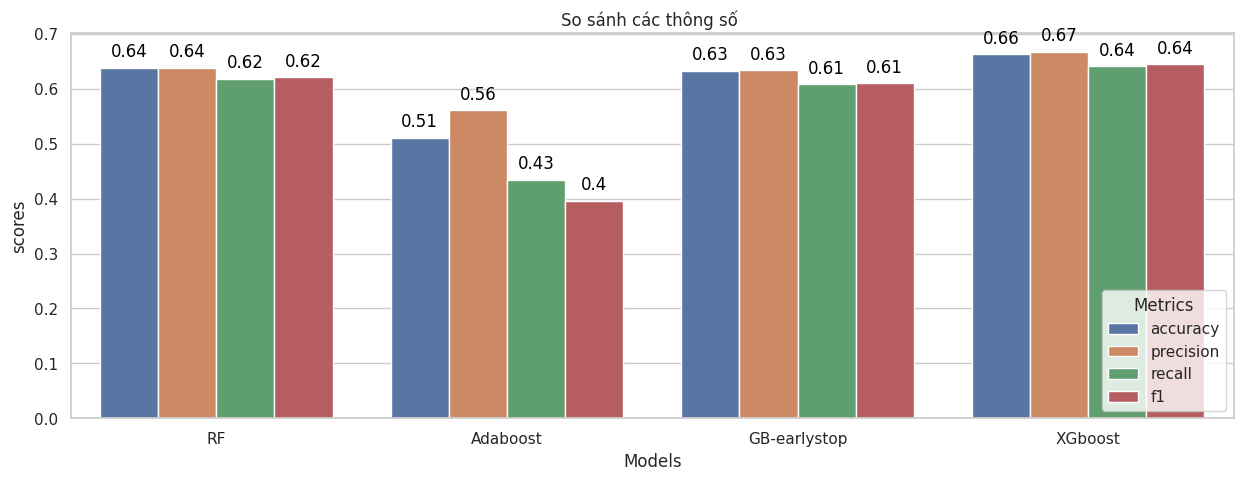

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(15,5))
sns.barplot(data=dfscore.melt(id_vars='name', var_name='Metrics', value_name='Values'), x='name', y='Values', hue='Metrics')
for index, row in dfscore.iterrows():
    for i, value in enumerate(row[1:]):
        plt.text(index + i * 0.2 - 0.3, value + 0.02, str(round(value, 2)), ha='center', color='black')

plt.xlabel('Models')
plt.ylabel('scores')
plt.title('So sánh các thông số ')
plt.legend(title='Metrics', loc='lower right')
# plt.ylim(-3,3)
# plt.tight_layout()
# plt.subplots_adjust(top=3)
plt.show()


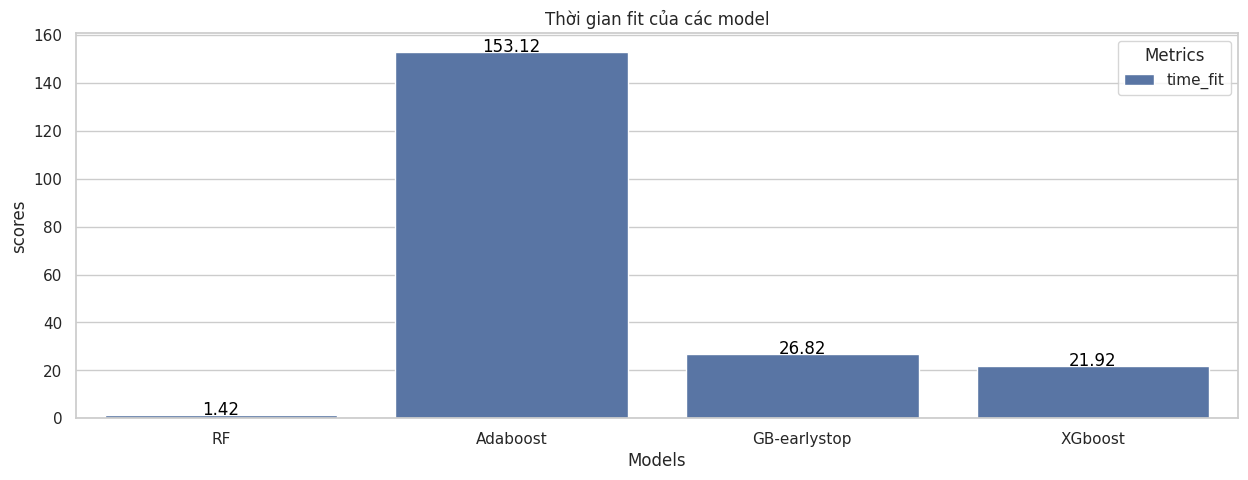

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(15,5))
sns.barplot(data=dftime.melt(id_vars='name', var_name='Metrics', value_name='Values'), x='name', y='Values', hue='Metrics')
for index, row in dftime.iterrows():
    for i, value in enumerate(row[1:]):
        plt.text(index + i * 0.2, value + 0.02, str(round(value, 2)), ha='center', color='black')

plt.xlabel('Models')
plt.ylabel('scores')
plt.title('Thời gian fit của các model')
plt.legend(title='Metrics', loc='upper right')
# plt.ylim(-3,3)
# plt.tight_layout()
# plt.subplots_adjust(top=3)
plt.show()

# Mộ số lưu ý.

một số lưu ý về thời gian:

--> adaboost: nếu để mặc định thì sẽ dùng decision tree (max depth =1) nên sẽ chạy nhanh hơn nhưng score sẽ thấp hơn.

  adaboost không có early stop nên phải tự làm bằng tay, thì nó sẽ dừng với số n lần score không thay đổi thì sẽ tiết kiệm được thời gian hơn.
	nhưng khi n_estimator lên tới vài trăm 500 600 1000 thì score mới cao nhất mà lúc đó early stop đã dừng rồi thì sẽ không chạy được tiếp nữa.

   cụ thể: khi không có early stop: accuracy, precision = 0.791667	0.79507 với thời gian = 9.7s . khi có earlystop: 0.745 0.736648 nhưng thời gian chỉ còn 0.7846s


--> Tương tự, GradienBoosting có early stop nên thời gian chạy khá nhanh. Mặc dù có dùng randomsearch để tìm thông số mà cũng chả thấy cải thiện gì

--> đối với XBGoost: để mặc định ít điều chỉnh tham số thì mô hình cũng khá chính xác, tuy nhiên nếu điều chỉnh tham số thì score vẫn không thay đổi đáng kể nhưng thời gian lại giảm đáng kể, trong bài thì giảm từ 4.984 còn 1.475